<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MWE logistic regression


### MWE

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

print(model.classes_)
print(model.intercept_)
print(model.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


In [2]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [3]:
model.predict_proba([[1], [2], [3]])

array([[0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451]])

In [4]:
model.predict(x) 

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [5]:
model.score(x, y)

0.9

In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x_train.reshape(-1, 1), y_train)

print(model.classes_)
print(model.intercept_)
print(model.coef_)

# on test set
print(model.predict(x_test.reshape(-1, 1)))
print(x_test)
print(y_test)

['benign' 'malignant']
[-1.08233285]
[[0.0044435]]
['malignant' 'benign']
[400 120]
['malignant' 'benign']


In [7]:
model.predict([[245]]) 

array(['malignant'], dtype='<U9')

In [8]:
model.classes_

array(['benign', 'malignant'], dtype='<U9')

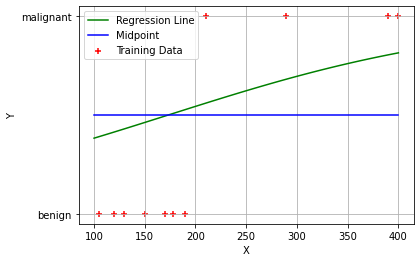

In [9]:
import matplotlib.pyplot as plt
from scipy.special import expit

plt.scatter(x, y, color='red', marker= '+', label= 'Training Data')

x_test = np.linspace(100, 400, 100)
loss = expit(model.coef_ * x_test + model.intercept_).ravel()
# print(loss)
plt.plot(x_test, loss , color='green', label='Regression Line')
plt.plot([100, 400], [0.5, 0.5], color='blue', label='Midpoint')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [10]:
model.predict_proba(x.reshape(-1, 1))

array([[0.53733656, 0.46266344],
       [0.49173672, 0.50826328],
       [0.56957347, 0.43042653],
       [0.50478446, 0.49521554],
       [0.6090258 , 0.3909742 ],
       [0.18520781, 0.81479219],
       [0.58549056, 0.41450944],
       [0.43983437, 0.56016563],
       [0.31924246, 0.68075754],
       [0.47219174, 0.52780826],
       [0.1952562 , 0.8047438 ]])

In [11]:
model.score(x.reshape(-1, 1), y)

0.8181818181818182

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, model.predict(x.reshape(-1, 1))))
print(classification_report(y, model.predict(x.reshape(-1, 1))))

[[5 2]
 [0 4]]
              precision    recall  f1-score   support

      benign       1.00      0.71      0.83         7
   malignant       0.67      1.00      0.80         4

    accuracy                           0.82        11
   macro avg       0.83      0.86      0.82        11
weighted avg       0.88      0.82      0.82        11



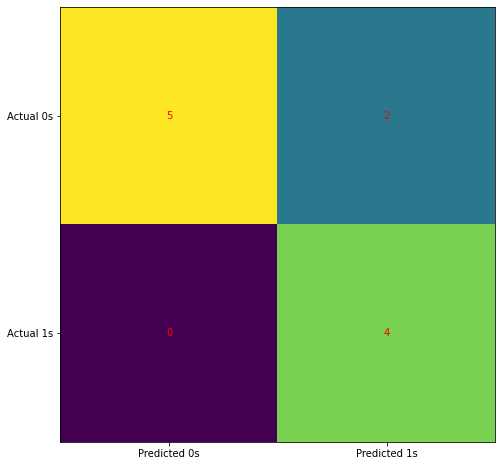

In [22]:
cm = confusion_matrix(y, model.predict(x.reshape(-1, 1)))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

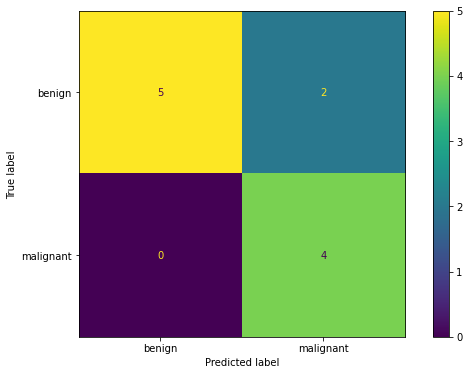

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm = confusion_matrix(y, model.predict(x.reshape(-1, 1)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

model = LogisticRegression(solver='liblinear', random_state=42) # penalty='none')
model.fit(x_train.reshape(-1, 1), y_train)

# Print metrics
print(model.predict(x_test.reshape(-1, 1)))
# print(x_test)
print(y_test)
print(model.score(x.reshape(-1, 1), y))



['benign' 'benign']
['malignant' 'malignant']
0.6363636363636364


In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# model = LogisticRegression(solver='liblinear', random_state=42) # acc 0.9090909090909091 - f1 0.8952380952380952
model = LogisticRegression(solver='newton-cg', random_state=42, penalty='none') # acc 0.9090909090909091 - f1 0.8952380952380952

# penalty='none'
model.fit(x_train.reshape(-1, 1), y_train)

# Print metrics
print(model.predict(x_test.reshape(-1, 1)))
# print(x_test)
print(y_test)
print(model.score(x.reshape(-1, 1), y))
print(confusion_matrix(y, model.predict(x.reshape(-1, 1))))
print(classification_report(y, model.predict(x.reshape(-1, 1))))

f1_score(y, model.predict(x.reshape(-1, 1)), average='macro')

['benign' 'malignant']
['benign' 'malignant']
1.0
[[7 0]
 [0 4]]
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00         7
   malignant       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



1.0

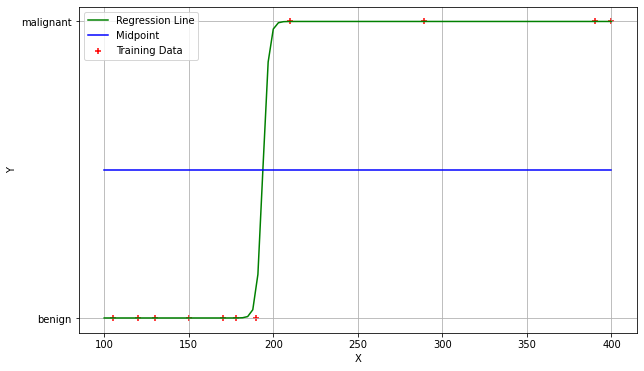

In [33]:
import matplotlib.pyplot as plt
from scipy.special import expit

plt.scatter(x, y, color='red', marker= '+', label= 'Training Data')

x_test = np.linspace(100, 400, 100)
loss = expit(model.coef_ * x_test + model.intercept_).ravel()
# print(loss)
plt.plot(x_test, loss , color='green', label='Regression Line')
plt.plot([100, 400], [0.5, 0.5], color='blue', label='Midpoint')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

['malignant' 'malignant']
['benign' 'malignant']
0.36363636363636365
[[0 7]
 [0 4]]
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00         7
   malignant       0.36      1.00      0.53         4

    accuracy                           0.36        11
   macro avg       0.18      0.50      0.27        11
weighted avg       0.13      0.36      0.19        11



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


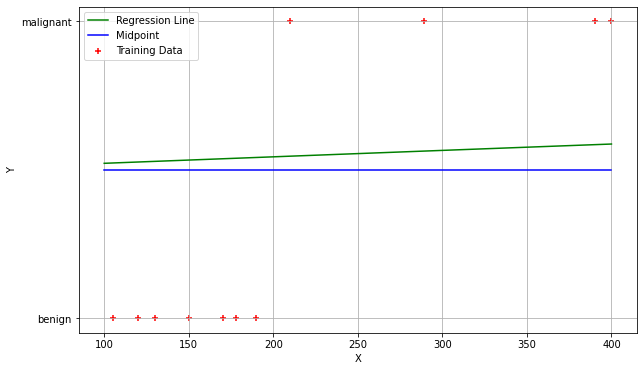

In [46]:
x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# model = LogisticRegression(solver='liblinear', random_state=42) # acc 0.9090909090909091 - f1 0.8952380952380952
# model = LogisticRegression(solver='newton-cg', random_state=42) # acc 1.0                - f1 1.0
# model = LogisticRegression(solver='newton-cg', random_state=42, penalty='none') # same as above, just sometime falls below 1
model = LogisticRegression(solver='sag', random_state=42, penalty='none')

model.fit(x_train.reshape(-1, 1), y_train)

# Print metrics
print(model.predict(x_test.reshape(-1, 1)))
# print(x_test)
print(y_test)
print(model.score(x.reshape(-1, 1), y))
print(confusion_matrix(y, model.predict(x.reshape(-1, 1))))
print(classification_report(y, model.predict(x.reshape(-1, 1))))

f1_score(y, model.predict(x.reshape(-1, 1)), average='macro')


# visualize
plt.scatter(x, y, color='red', marker= '+', label= 'Training Data')

x_test = np.linspace(100, 400, 100)
linear_function_output = model.coef_ * x_test + model.intercept_ # equation of the line
loss = expit(linear_function_output).ravel()
# print(loss)
plt.plot(x_test, loss , color='green', label='Regression Line')
plt.plot([100, 400], [0.5, 0.5], color='blue', label='Midpoint')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

['malignant' 'malignant']
['benign' 'benign']
0.36363636363636365
[[0 7]
 [0 4]]
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00         7
   malignant       0.36      1.00      0.53         4

    accuracy                           0.36        11
   macro avg       0.18      0.50      0.27        11
weighted avg       0.13      0.36      0.19        11



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


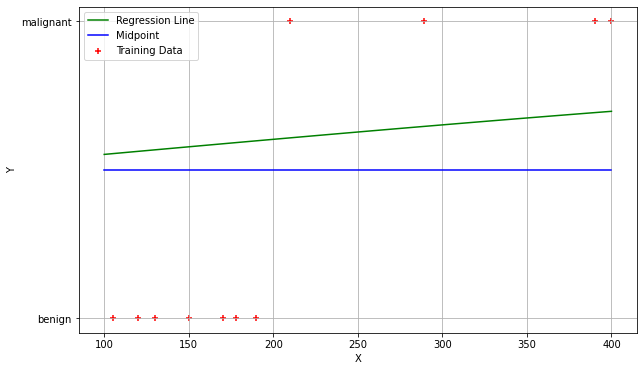

In [47]:
x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


model = LogisticRegression(solver='sag', random_state=42, penalty='l2', max_iter=100000)

model.fit(x_train.reshape(-1, 1), y_train)

# Print metrics
print(model.predict(x_test.reshape(-1, 1)))
# print(x_test)
print(y_test)
print(model.score(x.reshape(-1, 1), y))
print(confusion_matrix(y, model.predict(x.reshape(-1, 1))))
print(classification_report(y, model.predict(x.reshape(-1, 1))))

f1_score(y, model.predict(x.reshape(-1, 1)), average='macro')


# visualize
plt.scatter(x, y, color='red', marker= '+', label= 'Training Data')

x_test = np.linspace(100, 400, 100)
linear_function_output = model.coef_ * x_test + model.intercept_ # equation of the line
loss = expit(linear_function_output).ravel()
# print(loss)
plt.plot(x_test, loss , color='green', label='Regression Line')
plt.plot([100, 400], [0.5, 0.5], color='blue', label='Midpoint')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()



['benign' 'benign']
['benign' 'benign']
1.0
[[7 0]
 [0 4]]
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00         7
   malignant       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



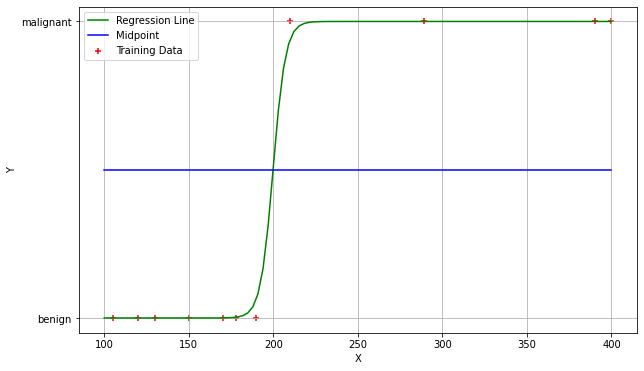

In [45]:
x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# model = LogisticRegression(solver='liblinear', random_state=42)                 # acc 0.9090909090909091 - f1 0.8952380952380952
# model = LogisticRegression(solver='newton-cg', random_state=42)                 # acc 1.0                - f1 1.0
# model = LogisticRegression(solver='newton-cg', random_state=42, penalty='none') # same as above, just sometime falls below 1
# model = LogisticRegression(solver='sag', random_state=42, penalty='none')       # acc 0.36363636363636365 - f1: none
# model = LogisticRegression(solver='sag', random_state=42, penalty='l2', max_iter=100000)
model = LogisticRegression(solver='liblinear', random_state=42, C=20000.0) 

model.fit(x_train.reshape(-1, 1), y_train)

# Print metrics
print(model.predict(x_test.reshape(-1, 1)))
# print(x_test)
print(y_test)
print(model.score(x.reshape(-1, 1), y))
print(confusion_matrix(y, model.predict(x.reshape(-1, 1))))
print(classification_report(y, model.predict(x.reshape(-1, 1))))

f1_score(y, model.predict(x.reshape(-1, 1)), average='macro')


# visualize
plt.scatter(x, y, color='red', marker= '+', label= 'Training Data')

x_test = np.linspace(100, 400, 100)
linear_function_output = model.coef_ * x_test + model.intercept_ # equation of the line
loss = expit(linear_function_output).ravel()
# print(loss)
plt.plot(x_test, loss , color='green', label='Regression Line')
plt.plot([100, 400], [0.5, 0.5], color='blue', label='Midpoint')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

['benign' 'benign']
[130 170]
['benign' 'benign']
1.0
[[7 0]
 [0 4]]
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00         7
   malignant       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



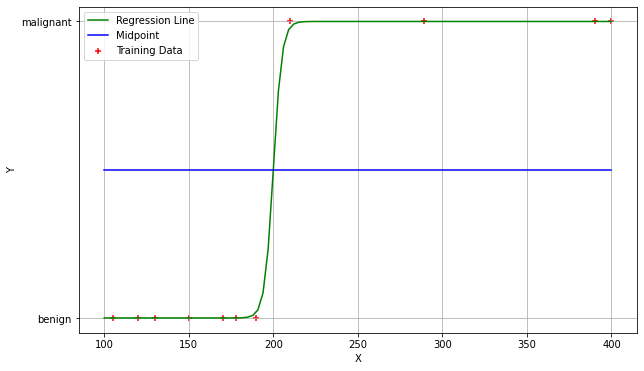

In [48]:
x = np.array([    150,      178,      130,      170,      105,         400,      120,         210,        289,       190,          390])
y = np.array(['benign', 'benign', 'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'benign', 'malignant'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# model = LogisticRegression(solver='liblinear', random_state=42)                 # acc 0.9090909090909091 - f1 0.8952380952380952
# model = LogisticRegression(solver='newton-cg', random_state=42)                 # acc 1.0                - f1 1.0
# model = LogisticRegression(solver='newton-cg', random_state=42, penalty='none') # same as above, just sometime falls below 1
# model = LogisticRegression(solver='sag', random_state=42, penalty='none')       # acc 0.36363636363636365 - f1: none
# model = LogisticRegression(solver='sag', random_state=42, penalty='l2', max_iter=100000)
# model = LogisticRegression(solver='liblinear', random_state=42, C=20000.0) 
model = LogisticRegression() 

model.fit(x_train.reshape(-1, 1), y_train)

# Print metrics
print(model.predict(x_test.reshape(-1, 1)))
print(x_test)
print(y_test)
print(model.score(x.reshape(-1, 1), y))
print(confusion_matrix(y, model.predict(x.reshape(-1, 1))))
print(classification_report(y, model.predict(x.reshape(-1, 1))))

f1_score(y, model.predict(x.reshape(-1, 1)), average='macro')


# visualize
plt.scatter(x, y, color='red', marker= '+', label= 'Training Data')

x_test = np.linspace(100, 400, 100)
linear_function_output = model.coef_ * x_test + model.intercept_ # equation of the line
loss = expit(linear_function_output).ravel()
# print(loss)
plt.plot(x_test, loss , color='green', label='Regression Line')
plt.plot([100, 400], [0.5, 0.5], color='blue', label='Midpoint')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()